### Packages

In [1]:
!pip install matplotlib
!pip install seaborn 
!pip install pandas

### Summary

In [10]:
import pandas as pd

#Loading the dataset
df = pd.read_csv('../Raw_Data/USER_TAKEHOME.csv')

# 1. General overview of the dataset: number of rows, columns, and data types
def dataset_overview(df):
    print("Dataset Overview")
    print("Number of Rows: ", df.shape[0])
    print("Number of Columns: ", df.shape[1])
    print("\n Column Data Types")
    print(df.dtypes)
    print("\n")

# 2. Summary of missing values
def missing_values_summary(df):
    print("Missing Values Summary")
    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
    print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))
    print("\n")

# Generate the dataset summary
def generate_summary(df):
    dataset_overview(df)
    missing_values_summary(df)

generate_summary(df)





    

Dataset Overview
Number of Rows:  100000
Number of Columns:  6

 Column Data Types
ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object


Missing Values Summary
              Missing Values  Percentage
ID                         0       0.000
CREATED_DATE               0       0.000
BIRTH_DATE              3675       3.675
STATE                   4812       4.812
LANGUAGE               30508      30.508
GENDER                  5892       5.892




### Code to Convert 'CREATED_DATE' and 'BIRTH_DATE' to Datetime Format in Pandas

In [11]:
# Convert CREATED_DATE and BIRTH_DATE to datetime format
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'], errors='coerce', utc=True)
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], errors='coerce', utc=True)

print(df[['CREATED_DATE', 'BIRTH_DATE']].head())

               CREATED_DATE                BIRTH_DATE
0 2020-06-24 20:17:54+00:00 2000-08-11 00:00:00+00:00
1 2021-01-03 19:53:55+00:00 2001-09-24 04:00:00+00:00
2 2023-05-31 18:42:18+00:00 1994-10-28 00:00:00+00:00
3 2023-12-26 01:46:22+00:00                       NaT
4 2023-10-28 11:51:50+00:00 1972-03-19 00:00:00+00:00


### Gender Mapping and Standardization using Pandas

In [12]:
# Gender Mapping
gender_mapping = {
    'My gender isn\'t listed': 'unspecified',
    'not_specified': 'unspecified',
    'not_listed': 'unspecified',
    
    'Prefer not to say': 'prefer_not_to_say',
    'prefer not to say': 'prefer_not_to_say',
    
    'non-binary': 'non-binary',
    'Non-Binary': 'non-binary',

    'f': 'female',
    'female': 'female',
    'Female': 'female',

    'm': 'male',
    'male': 'male',
    'Male': 'male'
}

# Apply the gender mapping to the GENDER column in user_df
df['GENDER'] = df['GENDER'].replace(gender_mapping)

# Verify the unique values after mapping
print(df['GENDER'].value_counts())

GENDER
female               64240
male                 25829
transgender           1772
prefer_not_to_say     1351
non_binary             473
unspecified            213
unknown                196
non-binary              34
Name: count, dtype: int64


### Standardize 'es-419' to 'es' in the LANGUAGE Column

In [13]:
# Standardize 'es-419' to 'es' (general Spanish)
df['LANGUAGE'] = df['LANGUAGE'].replace('es-419', 'es')

# Check the unique values to verify the change
print(df['LANGUAGE'].value_counts())

LANGUAGE
en    63403
es     6089
Name: count, dtype: int64


#### Distribution of Transactions by STATE

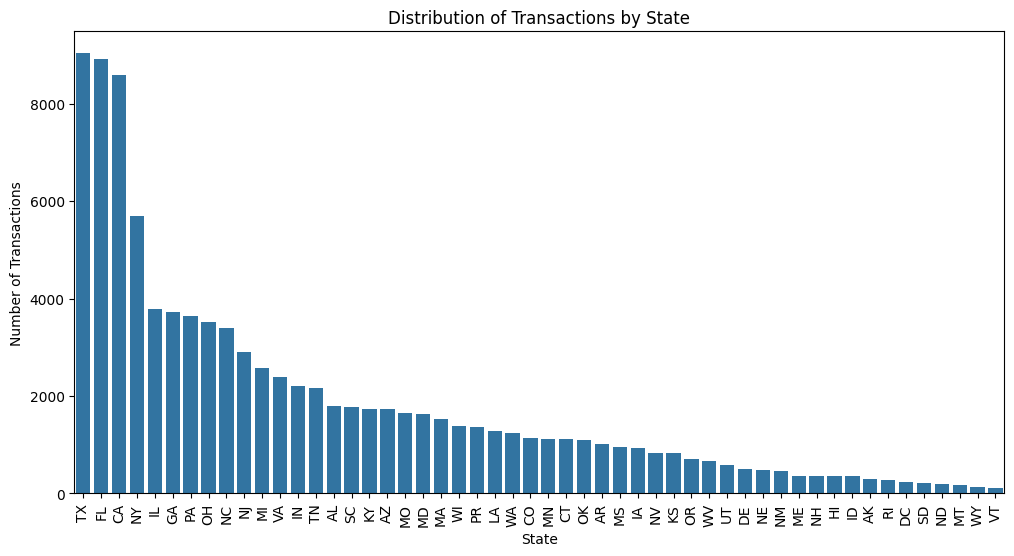

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

state_counts = df['STATE']. value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Distribution of Transactions by State')
plt.xticks(rotation=90)
plt.ylabel('Number of Transactions')
plt.xlabel('State')
plt.show()

### Distribution of Transactions by Gender


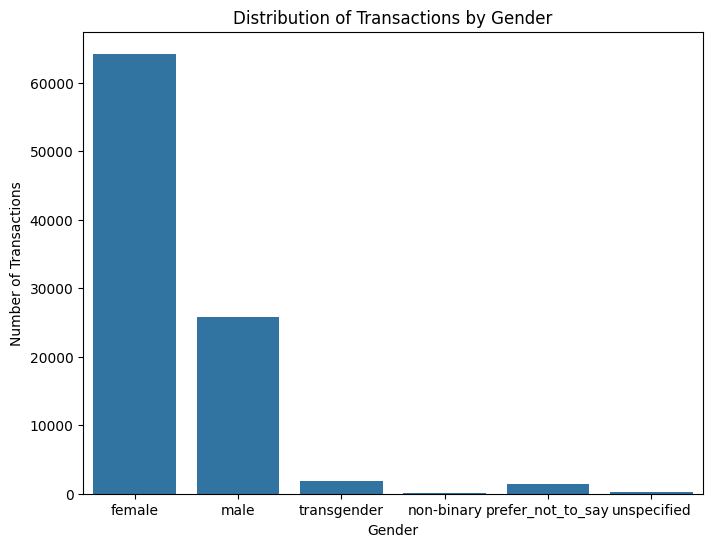

In [15]:
# Count of transactions by gender
gender_order = ['female', 'male', 'transgender', 'non-binary', 'prefer_not_to_say', 'unspecified']
gender_counts = df['GENDER'].value_counts().reindex(gender_order, fill_value=0)

# Plotting the distribution of transactions by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Transactions by Gender')
plt.ylabel('Number of Transactions')
plt.xlabel('Gender')
plt.show()


1. Age Distribution of Users
- This visualization will show the distribution of users' ages, helping you understand the age demographics of your user base.

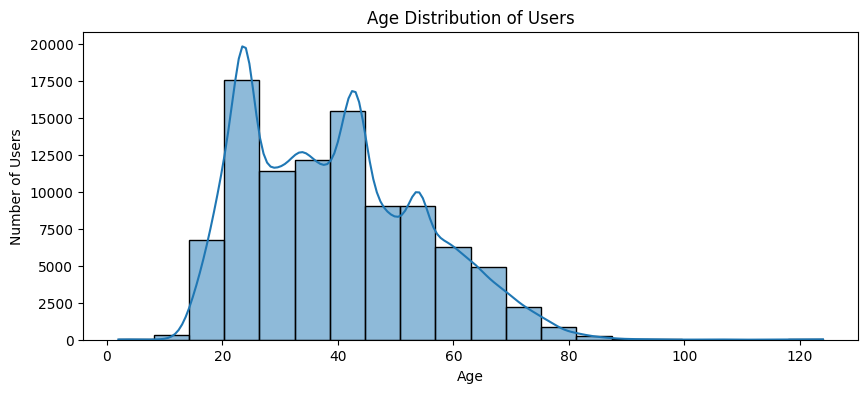

In [16]:
from datetime import datetime
import pytz

# Convert current_date to UTC timezone (since the BIRTH_DATE is in UTC)
current_date = datetime.now(pytz.utc)

# Calculate age
df['AGE'] = (current_date - pd.to_datetime(df['BIRTH_DATE'], errors='coerce')).dt.days // 365

# Plot the age distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['AGE'].dropna(), bins=20, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()


2. Language Preferences of Users
- Visualizing the distribution of users' preferred languages can help identify which languages are most commonly used, which may be useful for localization efforts.

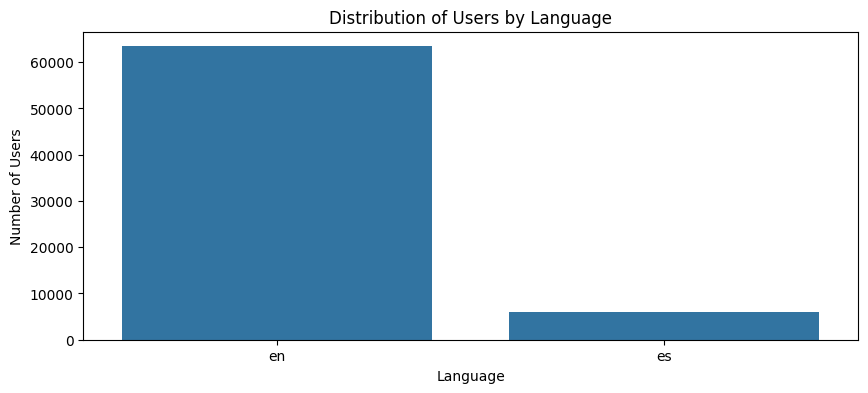

In [17]:
# Count of users by language
language_counts = df['LANGUAGE'].value_counts()

# Plot the language distribution
plt.figure(figsize=(10, 4))
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Distribution of Users by Language')
plt.xlabel('Language')
plt.ylabel('Number of Users')
plt.show()

3. Account Creation Over Time
- This time series plot shows the number of accounts created over time, which can help you identify trends in user sign-ups.

/var/folders/31/8b56lkw13m1cyzqj6t3xvmcr0000gn/T/ipykernel_93431/63987546.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  creation_time_series = df.set_index('CREATED_DATE').resample('M')['ID'].count()


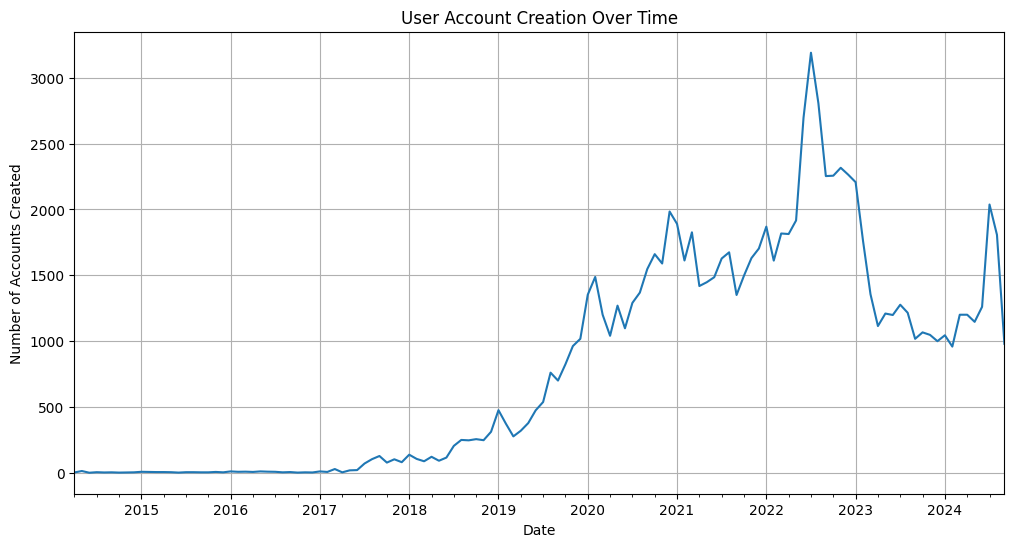

In [18]:
# Convert CREATED_DATE to datetime
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'], errors='coerce')

# Group by creation month
creation_time_series = df.set_index('CREATED_DATE').resample('M')['ID'].count()

# Plot the time series of account creations
plt.figure(figsize=(12, 6))
creation_time_series.plot()
plt.title('User Account Creation Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accounts Created')
plt.grid(True)
plt.show()
